<a href="https://colab.research.google.com/github/SIESOBOT/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS13%20TL%20BTR%20LUIS%20FELIPE%20URENA%202.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
import numpy as np
import pandas as pd
from scipy import stats


In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
 p_non_user = 1 - prob_drunk_prior
 numerator = 1 * prob_drunk_prior
 denominatior = 1 * (prob_drunk_prior) + (false_positive_rate) * p_non_user
 result = numerator / denominatior
 return result

In [13]:
#this is the probabilty of bob being drunk from the first test
prob_drunk_given_positive(1/1000,0.08)

0.012357884330202669

In [14]:
#this is the probability of bob being drunk after the 2nd test
prob_drunk_given_positive(0.123,0.08)

0.6367778007869124

In [15]:
#this is the probability of bob being drunk after the 3rd test (just one more to make sure)
prob_drunk_given_positive(0.636,0.08)

0.9562184267500601

In [16]:
#this is the probabilty of bob being drunk after the 4th test (yep, he is wated)
prob_drunk_given_positive(0.956,0.08)

0.9963314990828748

# It took 4 tests to make sure bob was drunk!

In [0]:
?stats.bayes_mvs()

In [0]:
wine = pd.read_csv('winequality-white.csv',sep=';')



In [25]:
wine['alcohol_ranges'] = pd.cut(wine.alcohol,5,labels=['1-3','3-6','6-9','9-12','12-15'])
wine['quality_ranges'] = pd.cut(wine.quality,3,labels=['1-3','3-6','6-9'])
contingency_table =  pd.crosstab(wine['alcohol_ranges'],wine['quality_ranges'],margins=True)
contingency_table

quality_ranges,1-3,3-6,6-9,All
alcohol_ranges,,,,
1-3,451,376,18,845
3-6,810,908,12,1730
6-9,323,1020,47,1390
9-12,51,659,85,795
12-15,5,115,18,138
All,1640,3078,180,4898


In [0]:
sample = wine['quality'].sample(100)

mean, var, std = stats.bayes_mvs(sample)

In [29]:
mean

Mean(statistic=5.8, minmax=(5.647055995446235, 5.952944004553765))

In [30]:
var

Variance(statistic=0.865979381443299, minmax=(0.6816786288494702, 1.0902530719896666))

In [31]:
std

Std_dev(statistic=0.9281848597009937, minmax=(0.8256383160013047, 1.0441518433588415))

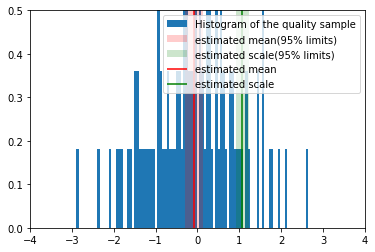

In [40]:
samples = stats.norm.rvs(size=100)
qual_mean, qual_res, qual_std = stats.bayes_mvs(samples,alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(samples,bins=100,density=True,label='Histogram of the quality sample')
ax.vlines(qual_mean.statistic,0,0.5,colors='r',label='estimated mean')
ax.axvspan(qual_mean.minmax[0],qual_mean.minmax[1],facecolor='r',
alpha = 0.2, label='estimated mean(95% limits)')
ax.vlines(qual_std.statistic,0,0.5, colors='g',label='estimated scale')
ax.axvspan(qual_std.minmax[0],qual_std.minmax[1],facecolor='g',alpha=0.2 ,label='estimated scale(95% limits)')
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0,0.5])
plt.show()


# diference between bayesian and frequentist statistics
*in my opinion, the frequentists approach is more dependent of the*
*frequency of the samples being analized , while a bayesian approach can come to a conclusion without having a big sample size of a population*

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!